In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exercise 1

### A

In [182]:
data1 = pd.read_csv('pca2.csv', sep=',')
data1.shape
data1.ix[0:2, 'X1':'X2']
data1.ix[0:2, :]

,X1,X2
0,-0.460516,-0.599575
1,1.004258,1.213128
2,2.224446,-0.584735


In [158]:
m = np.mean(data1, 0)
data1_centered = data1 - m
data1_centered.ix[0:2, :]

,X1,X2
0,-1.411663,-1.612040
1,0.053112,0.200662
2,1.273300,-1.597200


In [159]:
covariance1 = np.cov(data1_centered.T)
evals1, evecs1 = np.linalg.eig(covariance1)
transmat1 = evecs1.T
evec1 = transmat1[0]
evec2 = transmat1[1]

data1_trans = np.array([[0.0, 0.0] for i in range(len(data1))])
for i in range(len(data1)):
    data1_trans[i] = np.dot(transmat1, data1_centered.ix[i, :])
data1_trans[0:3, :]

array([[-1.99528617, -0.78121602],
       [ 0.1395242 ,  0.15368564],
       [ 0.39509079, -2.00405686]])

/home/georg/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


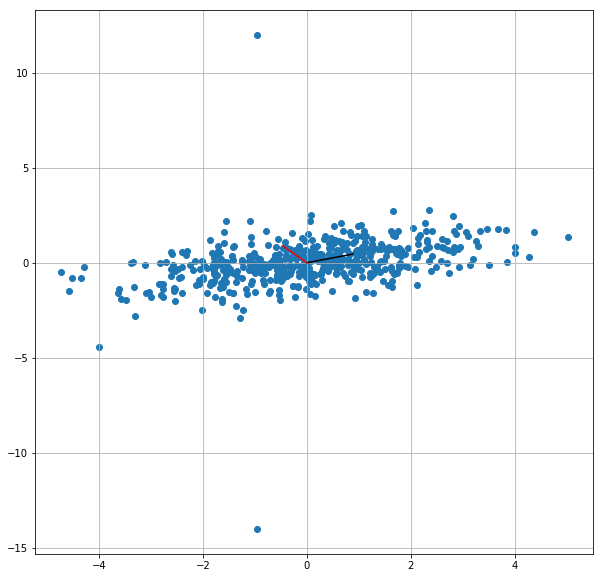

In [174]:
# plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(data1_centered.ix[:, 'X1'], data1_centered.ix[:, 'X2'])
ax.set_color_cycle(['black', 'red'])
plt.plot([0, evec1[0]], [0, evec1[1]])
plt.plot([0, evec2[0]], [0, evec2[1]])
plt.grid()
plt.show()

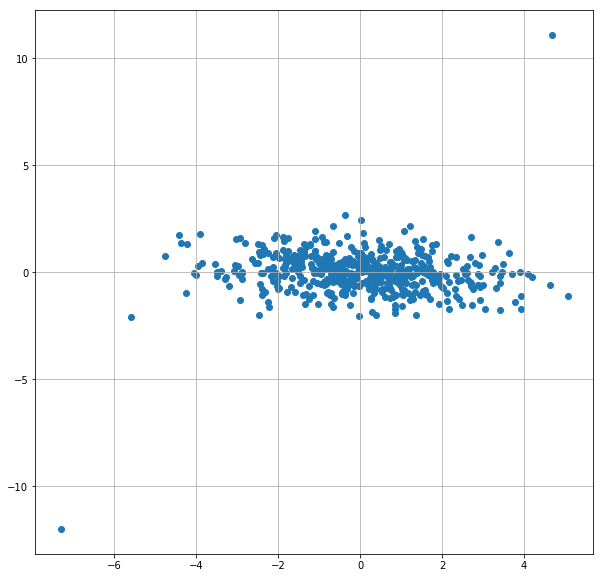

In [175]:
plt.figure(figsize=(10, 10))
plt.scatter(data1_trans.T[0], data1_trans.T[1])
plt.grid()
plt.show()

### B

In [176]:
data1b_c = np.copy(data1_centered)
data1b_c[16, :] = 0
data1b_c[156, :] = 0

cov1b = np.cov(data1b_c.T)
evals1b, evecs1b = np.linalg.eig(cov1b)
transmat1b = evecs1b.T
evec1b = transmat1b[0]
evec2b = transmat1b[1]

data1b_t = np.array([[0.0, 0.0] for i in range(len(data1))])
for i in range(len(data1)):
    data1b_t[i] = np.dot(transmat1b, data1b_c[i, :])

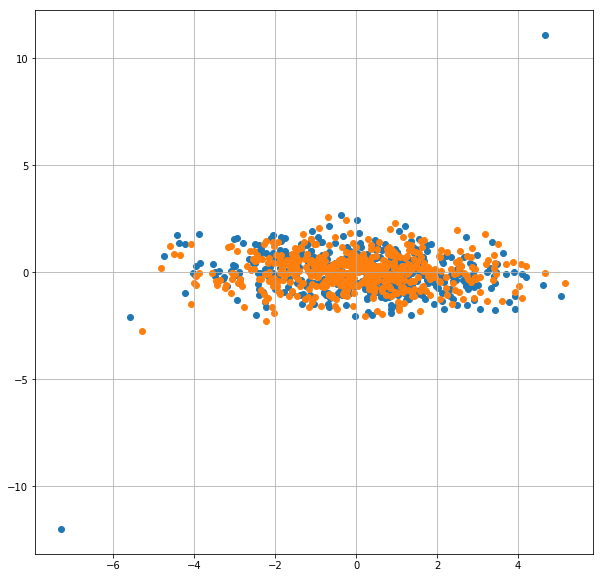

In [177]:
plt.figure(figsize=(10, 10))
plt.scatter(data1_trans.T[0], data1_trans.T[1])
plt.scatter(data1b_t.T[0], data1b_t.T[1])
plt.grid()
plt.show()

TODO What is the difference?